In [5]:
#Sentimenetal a
#this program will automatically generate the follow-up status from enquiry followup comment
import numpy as np
import pandas as pd
import string
import nltk
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer

In [6]:
follow_ups=pd.read_csv('enquiry_followups.csv')
follow_ups.describe()

,Comment,Status
count,113521,112645
unique,38755,16
top,"Still follow up through voice capaign, whats ...",Neutral
freq,5216,75821


In [7]:
follow_ups=follow_ups.dropna()

In [8]:
follow_ups=follow_ups.apply(lambda x: x.astype(str).str.lower())


In [9]:
follow_ups['Status'].loc[(follow_ups['Status'] == 'nuetral')|(follow_ups['Status'] == 'nutral')]='neutral'

In [10]:
#convert status to index
def getIndexOfStatus(status):
    status_values=['cancelled','negative','neutral','positive','registered']
    return status_values.index(status)
follow_ups['Status']=follow_ups['Status'].apply(lambda x: getIndexOfStatus(x))

follow_ups

,Comment,Status
0,"mail details send, inform seminar details, he ...",3
1,"pr, nr",3
3,will come to seminar,3
4,"pr, nr",2
5,pr.nr,2
...,...,...
142712,call not attending,1
142713,"looking at kannur , not interested for online",0
142714,call not attending,2
142715,today visited office,3


In [11]:
status_count=follow_ups.groupby('Status').count()
status_count

,Comment
Status,
0,4665
1,3336
2,84689
3,18637
4,674


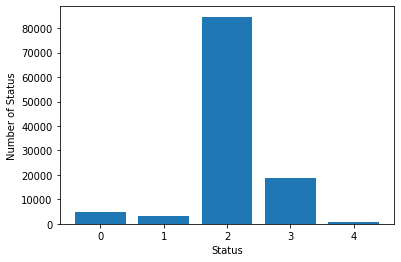

In [12]:
plt.bar(status_count.index.values, status_count['Comment'])

plt.xlabel('Status')
plt.ylabel('Number of Status')
plt.show()

In [13]:
remove_punk_dic= dict((ord(p_value),None) for p_value in string.punctuation)
lemmer=nltk.stem.WordNetLemmatizer()
#lemmatize tokens
def lem_tokens(tokens):
    return [lemmer.lemmatize(token_word) for token_word in tokens]

In [30]:
 """ This function will lemmatize input_corpus
 1. converts input_corpus to lower letter
 2. remove punctuation
 3. lemmatize using lem_tokens
 """ 
def lem_normalize(input_corpus):
    return lem_tokens(nltk.word_tokenize(input_corpus.lower().translate(remove_punk_dic)))


['mail details send, inform seminar details, he will came on next week tvm',
 'pr, nr',
 'will come to seminar',
 'pr, nr',
 'pr.nr',
 'pr.nr',
 'send mail',
 'send mail',
 'will come to seminar',
 'will come to seminar',
 'send mail',
 'will come to seminar',
 'send mail',
 'send mail',
 'send mail',
 'will come to seminar',
 'will come to seminar',
 'will come to seminar',
 'will come to seminar',
 'will come to seminar',
 'will come to seminar',
 'will come to seminar',
 'will come to seminar',
 'will come to seminar',
 'will come to seminar',
 'will come to seminar',
 'will come to seminar',
 'will come to seminar',
 'will come to seminar',
 'will come to seminar',
 'gfgfgf',
 'will come seminar',
 'will come seminar',
 'will try to come on saturday',
 'status changed',
 'send mail..',
 'will come on seminar',
 'send mail',
 'interested in mt/ ms send mail',
 'interested in mt/ ms send mail',
 'interested in mt/ ms, send mail',
 'send mail, need follow up',
 'send mail, need follow

In [33]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(lowercase=True,stop_words='english',ngram_range = (1,1),tokenizer = lem_normalize)
text_counts= cv.fit_transform(follow_ups['Comment'].tolist())


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


{'mail': 5846,
 'send': 8243,
 'inform': 4762,
 'seminar': 8201,
 'came': 2350,
 'week': 9771,
 'tvm': 9435,
 'pr': 7327,
 'nr': 6746,
 'come': 2709,
 'prnr': 7431,
 'gfgfgf': 4289,
 'try': 9411,
 'saturday': 8106,
 'status': 8664,
 'changed': 2492,
 'interested': 4895,
 'mt': 6360,
 'm': 5820,
 'need': 6477,
 'follow': 4100,
 'admission': 1188,
 'monday': 6218,
 'needfollow': 6480,
 'ppt': 7326,
 'online': 6946,
 'attachmentint': 1733,
 'section': 8178,
 'joining': 5432,
 'cochin': 2641,
 'id': 4663,
 'beethaedison1989gmailcom': 2026,
 'mailwith': 5889,
 '3': 356,
 'day': 3087,
 'bcom': 2005,
 'result': 7911,
 'waiting': 9702,
 'final': 4045,
 'year': 10043,
 'degree': 3194,
 'doing': 3574,
 'today': 9146,
 'attend': 1745,
 'exam': 3869,
 'valuation': 9567,
 'af': 1236,
 'int': 4870,
 'join': 5407,
 'june': 5489,
 'batch': 1957,
 '1': 15,
 'month': 6248,
 'gave': 4253,
 'centre': 2455,
 'july': 5484,
 'responding': 7890,
 'omanwhats': 6922,
 'app': 1562,
 'bt': 2186,
 'response': 7899

In [16]:
from sklearn.model_selection import train_test_split
#this is how we split the data as train set and test set

X_train, X_test, y_train, y_test = train_test_split(text_counts, follow_ups['Status'].tolist(), test_size=0.2, random_state=4)

In [17]:
X_test

<22401x10094 sparse matrix of type '<class 'numpy.int64'>'
	with 70004 stored elements in Compressed Sparse Row format>

In [18]:
from sklearn.naive_bayes import MultinomialNB
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Generation Using Multinomial Naive Bayes
clf = MultinomialNB().fit(X_train, y_train)
predicted= clf.predict(X_test)
print("MultinomialNB Accuracy:",metrics.accuracy_score(y_test, predicted))



MultinomialNB Accuracy: 0.7594303825722066


In [72]:
data_list=['not intrested..got a job..', 'her  talk to very rough, follow up by Ameer','looking for job not now','not intrested']
cv2 = CountVectorizer(vocabulary=cv.vocabulary_,lowercase=True,stop_words='english',ngram_range = (1,1),tokenizer = lem_normalize)
X_test1= cv2.transform(data_list)



In [73]:
predicted2= clf.predict(X_test1)
status_values=['cancelled','negative','neutral','positive','registered']
Status_List = [status_values[i] for i in predicted2]

Status_List 

['negative', 'neutral', 'negative', 'neutral']